## Malls
- File Reading


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = r"D:\ML\Mall_Customers.csv"

In [4]:
df = pd.read_csv(path)

## Basic Data Quality Check

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

### Tack age , spending score and annual income as data

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
x = df [['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]]

In [10]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [11]:
## Rename column name
x.columns = ['Age' , 'Annual Income' , 'Spending Score']

In [12]:
x.head(1)

,Age,Annual Income,Spending Score
0,19,15,39


In [13]:
x.columns

Index(['Age', 'Annual Income', 'Spending Score'], dtype='object')

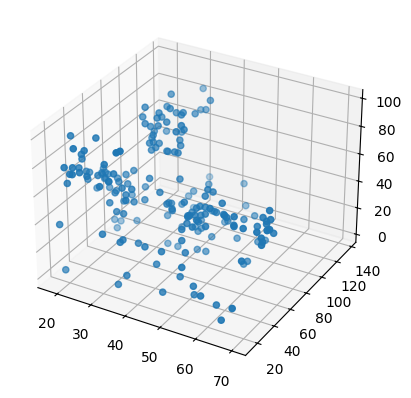

In [14]:
ax = plt.axes(projection = '3d')
x1 = x['Age']
y1 = (x['Annual Income'])
z1 = (x['Spending Score'])
ax.scatter(x1 , y1 , z1)

## create pipeline

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [16]:
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),   
    ('scaler',StandardScaler())             
])

cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),    
    ('encoder',OneHotEncoder())
])

In [17]:
x_scaled = num_pipeline.fit_transform(x)

In [18]:
x_scaled = pd.DataFrame(x_scaled , columns = x.columns)

In [20]:
x_scaled.head()

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Model fitting

In [38]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=6 )


In [39]:
agg.fit(x_scaled)

,n_clusters,6
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [40]:
labels = agg.labels_

In [41]:
labels

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [42]:
from sklearn.metrics import silhouette_score
sil = silhouette_score(x_scaled , labels)
sil

0.4201169558789579

In [43]:
x_scaled['Labels'] = labels

In [47]:
colors = []
for i in labels :
    if i == 0 :
        colors.append('red')
    elif i == 1 :
        colors.append('blue')   
    elif i == 2 :
        colors.append('green')  
    elif i == 3 :
        colors.append('pink')  
    elif i == 4 :
        colors.append('purple')
    else :
        colors.append('orange') 



In [48]:
colors 

['purple',
 'orange',
 'purple',
 'orange',
 'purple',
 'orange',
 'purple',
 'orange',
 'purple',
 'orange',
 'purple',
 'orange',
 'purple',
 'orange',
 'purple',
 'orange',
 'purple',
 'orange',
 'purple',
 'orange',
 'purple',
 'orange',
 'purple',
 'orange',
 'purple',
 'orange',
 'purple',
 'red',
 'purple',
 'orange',
 'purple',
 'orange',
 'purple',
 'orange',
 'purple',
 'orange',
 'purple',
 'orange',
 'purple',
 'orange',
 'blue',
 'orange',
 'purple',
 'red',
 'purple',
 'orange',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'blue'

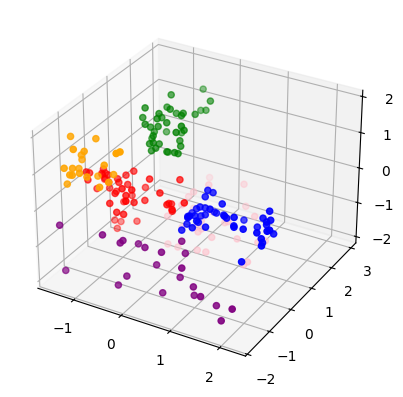

In [50]:
ax = plt.axes(projection = '3d')
x1 = x_scaled['Age']
y1 = (x_scaled['Annual Income'])
z1 = (x_scaled['Spending Score'])
ax.scatter(x1 , y1 , z1 , c = colors)

In [ ]:
from scipy.spatial.